# Midterm 2 - Spring 2024 CS 133



*   Remember to attempt extra credit (including adding comments or pseudocode)
*   No ChatGPT or other AI tools allowed
* No messaging or talking with other students

There are a series of coding questions first, then at the end, there are some short answer or bullet point response questions.

You only need to answer 2 of the short response questions. You can choose which ones to answer.


In [161]:
# Name: Maxim Dokukin
# SJSU Student ID: 017025164

In [162]:
# I am recommending these import statements and I don't think you need to run
# the configure_plotly_state() function.
# I think just these imports will be okay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Question 1 (5 points)

Read the data into a pandas dataframe.

**Url: `https://docs.google.com/spreadsheets/d/1RRx3sHfHi0OqzWem1u1_sbqOW1mkI9GFfH3-aELu8-U/export?format=csv`**


This dataset is a collection of sales from three different stores located in Yangon, Naypyitaw, and Mandalay.

## The columns in the dataset represent (bolded columns we will use in our analysis):
`Invoice id`: Computer generated sales slip invoice identification number.

`Branch`: Branch of supercenter (3 branches are available identified by A, B and C).

**`City`: Location of supercenters.**

`Customer type`: Type of customers, recorded by Members for customers using member card and Normal for without member card.

**`Gender`: Gender type of customer.**

**`Product line`: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.**

`Unit price`: Price of each product in $.

`Quantity`: Number of products purchased by customer.

`Tax`: 5% tax fee for customer buying.

**`Total`: Total price including tax.**

**`Date`: Date of purchase (Record available from January 2019 to March 2019).**

`Time`: Purchase time (10am to 9pm).

`Payment`: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

`COGS`: Cost of goods sold.

`Gross margin percentage`: Gross margin percentage.

`Gross income`: Gross income.

**`Rating`: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).**

In [163]:
# Your Code Here ...
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1RRx3sHfHi0OqzWem1u1_sbqOW1mkI9GFfH3-aELu8-U/export?format=csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [164]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Question 2 (3 point)

Run the code below to change the date values to datetime to enable accurate sorting.

In [165]:
df["Date"] = pd.to_datetime(df.Date)

# Question 3 (14 points)


Create a plotly strip plot comparing the 'Rating' by 'City' and 'Gender'.

Include 'Total' and 'Product line' information as hover_data.
Be sure to title your plot.

[Example output](https://docs.google.com/document/d/1unNq4OcikREQIAexLLkcHsUlgLnjLeDc_fFvKPQsKR4/edit#heading=h.pnyrtkwabuh8)

Links to px.strip documentation:
https://plotly.com/python/strip-charts/

https://plotly.com/python-api-reference/generated/plotly.express.strip




###To change opacity, you can run the following line of code:


```
the_name_of_your_figure_here.update_traces({'marker':{ "opacity": 0.2}})
```



In [166]:
# Your Code Here...
import plotly.express as px

fig = px.strip(df, x="Rating", y="City", color="Gender", hover_data=['Total', 'Product line'])
fig.update_traces({'marker':{ "opacity": 0.2}})

fig.update_layout(
    title_text="Stores Rating by City and Genders"
)
fig.show()

# Question 4 (14 points)

Create a dataframe that calculates the total sales made across all stores broken down by product line and gender.

[Example Output](https://docs.google.com/document/d/1unNq4OcikREQIAexLLkcHsUlgLnjLeDc_fFvKPQsKR4/edit#heading=h.xclgjz27kycl)

In [167]:
# Your Code Here...
total_sales = pd.DataFrame(df.groupby(['Product line', 'Gender']).Total.sum().reset_index())
total_sales = total_sales.pivot(index='Product line', columns='Gender', values='Total')
total_sales

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


# Question 5 (14 points)

Using the dataframe from Question X, create a visualization like this [example output](https://docs.google.com/document/d/1unNq4OcikREQIAexLLkcHsUlgLnjLeDc_fFvKPQsKR4/edit#heading=h.g529ygxfitfs)


*   Make sure that all values 20,000 or below are given the same color.
*   Make sure we can see all the values
* Use fmt=".2f" to see 2 decimal points
* Title the plot by providing the highest spending category for each gender

If you did not complete question X, you can read in the data here:
`"https://docs.google.com/spreadsheets/d/1faxMNkbDtqfdVP47I-2l1TZoZbQCMtJfcRRC4w07c6g/export?format=csv"`

If you are running into issues using this data for the visualization, please raise your hand.



Text(0.5, 1.0, 'The highest spending category for Females is Food and Bewerages,\nand the highest spending category for Males is Health and Beauty')

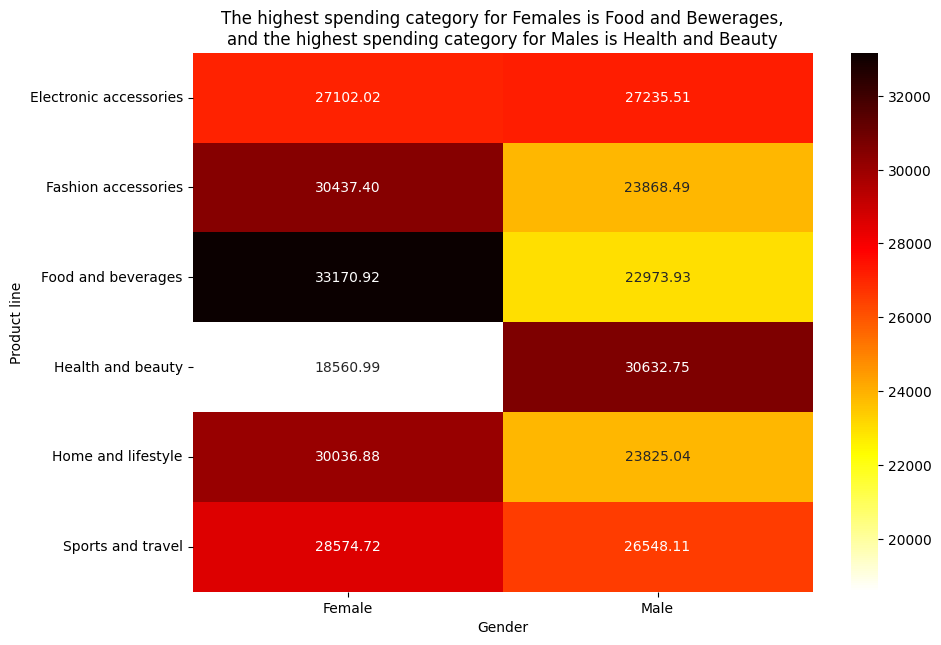

In [168]:
# Your Code Here...
plt.figure(figsize=(10,7))

sns.heatmap(data=total_sales,
            annot=True,
            cmap="hot_r",
            fmt=".2f"
           )

plt.title("The highest spending category for Females is Food and Bewerages,\nand the highest spending category for Males is Health and Beauty")

# Question 6 (14 points)

Calculate the total daily sales (using the 'Total' column) and the total number of customers (assume each row is one customer) per day ('Date' column). Display the dataframe below.

[Example Output](https://docs.google.com/document/d/1unNq4OcikREQIAexLLkcHsUlgLnjLeDc_fFvKPQsKR4/edit#heading=h.ow0ik1mjz3p1)

In [169]:
sales = df.groupby('Date').Total.sum().reset_index()
customers = df.groupby('Date').Total.count().reset_index()

daily_sales = sales.merge(customers, on='Date')
daily_sales.columns = ['Date', 'Total Sales', 'Total Customers']
daily_sales

,Date,Total Sales,Total Customers
0,2019-01-01,4745.1810,12
1,2019-01-02,1945.5030,8
2,2019-01-03,2078.1285,8
3,2019-01-04,1623.6885,6
4,2019-01-05,3536.6835,12
...,...,...,...
84,2019-03-26,1962.5130,13
85,2019-03-27,2902.8195,10
86,2019-03-28,2229.4020,10
87,2019-03-29,4023.2430,8


# Question 7 (16 points)

Using the data from question X, plot a plotly double y-axis line plot to explore the relationship between the total daily sales and the number of purchases each day.



*   Put the unit of TIME PASSING on the X-axis
*   One y-axis unit is the total daily sales across all stores
*   The other y-axis is the total number of customers across all stores


**If you did not answer question X, you can read in the data using this url `https://docs.google.com/spreadsheets/d/1_RqXSme_dy-sMQ2UPymkYgPEY7TvZjCeantXdADZWX4/export?format=csv`.**




[Example Plot](https://docs.google.com/document/d/1unNq4OcikREQIAexLLkcHsUlgLnjLeDc_fFvKPQsKR4/edit#heading=h.qvhsppx2pm9f)

In [170]:
# Your code here...
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=daily_sales.Date, y=daily_sales['Total Sales'], name="Total Sales"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=daily_sales.Date, y=daily_sales['Total Customers'], name="Total Customers"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Cumulative Daily Sales for Stores in Yangon, Naypyitaw, and Mandalay"
)

fig.update_xaxes(title_text="xaxis title")
fig.update_yaxes(title_text="Total Sales", secondary_y=False)
fig.update_yaxes(title_text="Total Customers", secondary_y=True)

fig.show()

# In the section below (Questions 8-11), **choose 2 short answer questions** to answer that will count towards your grade.

# Question 8 (10 points)

What are three things that plotly enables us (as either people creating the data visualization or as people using a visualization) to do that seaborn cannot do?

Do you think it would be a good idea to use plotly in a journal article? Why or why not?

Your answer here...

Three things plotly does that seaborn can't do:
*   It allows to customize the data displayed; for example selecting range of dates.
*   It allows for additional information on hower.
*   Supports a wide range of chart types, including 3D plots and geographical maps.


I would use plotly in a journal article because I believe in transparency and open source. Whatever picture I am conveying, I want reader to be able to verify that I am not cherry picking some data to fit my thesis. It also allows for exploration of data.


# Question 9 (10 points)

If we have a dataset of information about currency (serial numbers, security markings, denomination/bill) and a column that encodes whether the row represents a real bill or a counterfeit/fake bill. We want to use this dataset to train a model to predict whether a bill is counterfeit or real.







**Part A:** Is the problem described above a supervised or unsupervised problem?

**Part B:** Is the problem described above a classification or regression problem?

Your Answer Here ...


*   It is supervised learning, as we have data (labels) that represents whether bill is fake or authentic.
*   It is classifications, as we are not trying to predict a value, but rather a category.

# Question 10 (10 points)

**Part A:** What is the difference between One Hot Encoding and Ordinal Encoding?


**Part B:** For the Security Markings data column, the data represented can be either 'Hologram', 'Watermark', 'Security Thread', or 'Microprint'. Which encoding strategy would work better? Why?


Your Answer Here ...


*   One Hot creates n length array for n categories, and uses bool value to represent each category. For example with RGB colors : [1., 0., 0.] - Red, [0., 1., 0.] - Green, [0., 0., 1.] - Blue. It is useful for categories that has no ordinal information.
*   Ordinal encoding maps n categories into numbers 0 to n-1. For example grades F, D, C, B, A: F-[0.], D-[1.]...A-[4.]. Works better for data that has ordinal relationship.
*   One Hot would work better in this case, as there is no ordinal information between 'Hologram', 'Watermark', 'Security Thread', or 'Microprint'

# Question 11 (10 points)

One of the first steps in the Machine Learning Process is to split our dataset into a test and train dataset.

What is the purpose of separating the data into these two datasets?

Your Answer Here ...


*   The training set will be used to train the model.
*   Testing set will not be used until the model evaluation. And will be used to evaluate how accurately model can make predictions on the data that it has never seen.
*   The main purpose is to save some data from the model for later evaluation.

In [171]:
# EC

In [172]:
total_sales

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


In [173]:
def classify_cell(value):
    if value > 15:
        return str(round(value,2))
    else:
        return ""

total_sales.loc[total_sales.Female.idxmax()]


# df.loc[df.index.difference(total_sales.Female.idxmax()),'Female']
# df.index.difference(total_sales.Female.idxmax())


# not really sure how to set labels to idxmax

Gender
Female    33170.9175
Male      22973.9265
Name: Food and beverages, dtype: float64

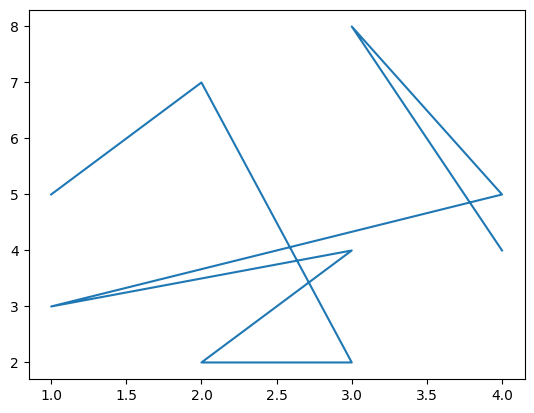

In [174]:
x = [1,2,3,2,3,1,4,3,4]
y = [5,7,2,2,4,3,5,8,4]

plt.plot(x, y)

<Axes: >

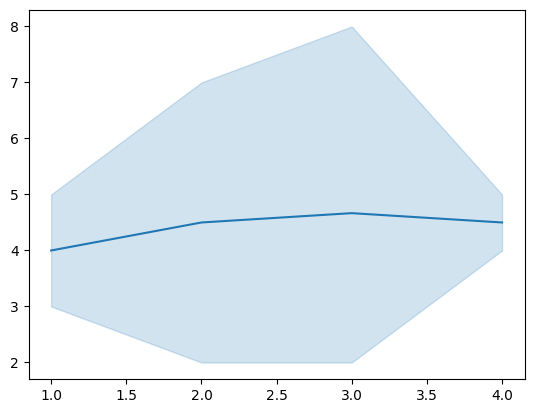

In [175]:
sns.lineplot(x=x, y=y)

In [176]:
# plotly went straight from x_n, y_n to x_(n+1), y_(n+1), while seaborn classified some points as outliers, and plotted a general trend line
# to fix plt, I could do scatter plot with linear regression line

<Axes: xlabel='Week Day'>

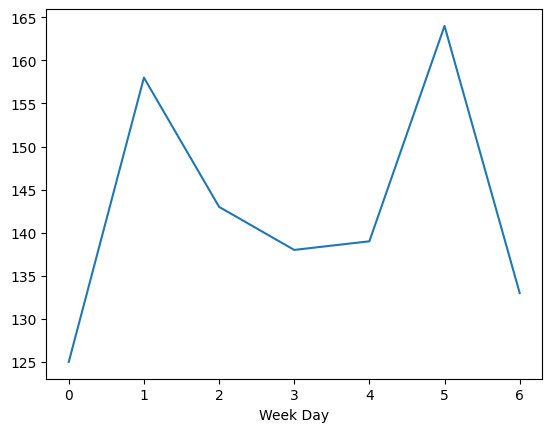

In [177]:
df['Week Day'] = df.Date.dt.dayofweek
df.groupby('Week Day').Total.count().plot()

In [178]:
# Monday and Friday are the busiest, while Sa and Su are the most relaxed

In [179]:
day_wk_ct = df.groupby(['City', 'Week Day']).Total.count().reset_index()
day_wk_ct

,City,Week Day,Total
0,Mandalay,0,39
1,Mandalay,1,53
2,Mandalay,2,50
3,Mandalay,3,44
4,Mandalay,4,51
5,Mandalay,5,60
6,Mandalay,6,35
7,Naypyitaw,0,38
8,Naypyitaw,1,54
9,Naypyitaw,2,50


<Axes: xlabel='Week Day', ylabel='Total'>

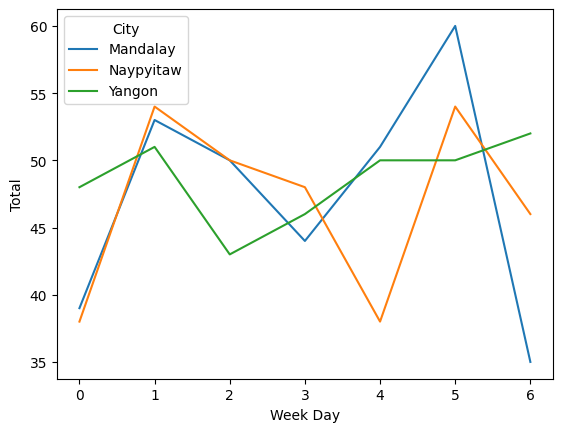

In [180]:
sns.lineplot(day_wk_ct, x='Week Day', y='Total', hue='City')

In [181]:
# There is difference by city.
# While Mo is the busiest for all 3, Yangon is more busy in general than other stores.
# Also, Mandalay is the least crowded on the weekends

In [182]:
# The data is not normalized though, so might be a little misleading

In [183]:
totals = day_wk_ct.groupby('City').Total.sum().reset_index()

norm = day_wk_ct.merge(totals, on='City')
norm['Share'] = norm['Total_x'] / norm['Total_y']
norm

,City,Week Day,Total_x,Total_y,Share
0,Mandalay,0,39,332,0.117470
1,Mandalay,1,53,332,0.159639
2,Mandalay,2,50,332,0.150602
3,Mandalay,3,44,332,0.132530
4,Mandalay,4,51,332,0.153614
5,Mandalay,5,60,332,0.180723
6,Mandalay,6,35,332,0.105422
7,Naypyitaw,0,38,328,0.115854
8,Naypyitaw,1,54,328,0.164634
9,Naypyitaw,2,50,328,0.152439


<Axes: xlabel='Week Day', ylabel='Share'>

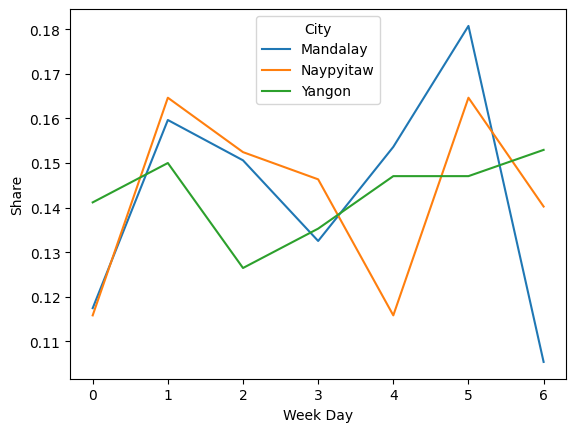

In [184]:
sns.lineplot(norm, x='Week Day', y='Share', hue='City')

In [185]:
# It looks the same, so the total number of sales is pretty much the same for all 3 stores